# Importação de Bibliotecas e Carregamento dos Dados


In [ ]:
# Primeiro, importo as bibliotecas essenciais para análise e modelagem de dados.
# Estou usando apenas bibliotecas comuns para evitar complexidade desnecessária.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Configuro o estilo dos gráficos
plt.style.use("seaborn-v0_8")
sns.set_palette('muted')

# Agora, faço o carregamento da base de dados que salvei como CSV
df = pd.read_csv('desafio_indicium_imdb.csv')

In [ ]:
# Visualizo as primeiras 5 linhas para entender a estrutura inicial da tabela
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


# 1. Análise Exploratória dos Dados (EDA)

Nesta seção vou analisar a base de dados de forma exploratória.

## 1.1 Estrutura da Base

Aqui vou verificar a quantidade de linhas e colunas, os tipos de dados e estatísticas básicas.


In [ ]:
# Primeiro, quero verificar quantas linhas e colunas existem na base de dados
df.shape

(999, 16)

In [ ]:
# Verificando quantas linhas e colunas existem na base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [ ]:
# Gerando estastísticas descritivas básicas das variaveis numéricas
df.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


## 1.2 Valores Ausentes

Nesta parte, vou verificar se existem valores nulos na base de dados e entender quais colunas podem precisar de tratamento antes de análises ou modelagem.


In [ ]:
# Primeiro, quero contar quantos valores nulos existem em cada coluna
# Isso me ajuda a entender se preciso preencher ou tratar esses dados
df.isnull().sum()

,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


# 1.3 Tratamento dos Dados (Limpeza)

Notei que algumas colunas, como Gross e Runtime, estão em formatos que não são numéricos, preciso limpá-las para poder fazer os cálculos e gráficos que o desafio pede.

In [ ]:
# Como vi na análise anterior, a coluna 'Gross' (Faturamento) está como texto e tem vírgulas.
# Uso .str.replace(',', '') para remover a vírgula e .astype(float) para converter para número decimal
df['Gross'] = df['Gross'].str.replace(',', '', regex=True).astype(float)

# A coluna 'Runtime' (Duração) tem a palavra ' min' junto com o número.
# Para ter só o número, eu removo o ' min' e converto o resultado para um número inteiro.
df['Runtime'] = df['Runtime'].str.replace('min', '', regex=True).astype(int)

# A coluna 'Released_Year' contém valores de texto como ('PG') que impedem a conversão direta para números inteiros
# Vou usar o pd.to_numeric para converter os valores que são anos e colocar 'nan' onde a conversão falhar
# Depois vou converter para o tipo de dado inteiros
df['Released_Year'] = pd.to_numeric (df['Released_Year'], errors='coerce').astype(pd.Int64Dtype())

# A coluna 'Unnamed: 0' parece ser apenas um índice, eu vou removê-la para não atrapalhar a análise.
# Uso 'axis=1' para indicar que quero remover uma coluna.
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
# Vou verificar novamente as informações da base para ter certeza que as mudanças deram certo.
print("Informações atualizadas sobre o dataset:")
df.info()


Informações atualizadas sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  998 non-null    Int64  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: Int64(1), float64(3), int64(2), object(9)
memory usage: 118.2+ KB


# 1.4 Análises e Visualizações Adicionais (EDA)

Nesta seção, vou usar as colunas que acabamos de limpar para gerar gráficos que nos ajudem a entender melhor o dataset. A ideia é criar visualizações que respondam a perguntas do desafio

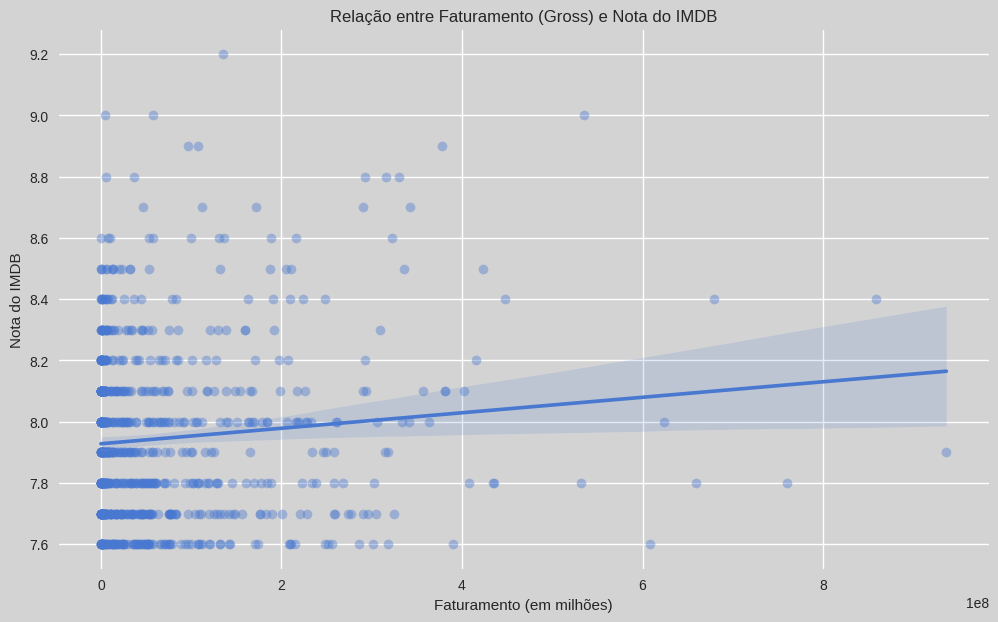

In [ ]:
# Analisando a relação entre o faturamento dos filmes e a nota do IMDB.
# Eu quero ver se filmes que ganham mais dinheiro também têm notas melhores.
# Para isso, vou usar um gráfico que mostra cada filme como um ponto e uma linha de tendência geral.
plt.figure(figsize=(12,7), facecolor='lightgray')
ax = sns.regplot(x='Gross', y='IMDB_Rating', data=df, scatter_kws={'alpha': 0.4})
ax.set_facecolor('lightgray')
plt.title('Relação entre Faturamento (Gross) e Nota do IMDB')
plt.xlabel('Faturamento (em milhões)')
plt.ylabel('Nota do IMDB')
plt.show()

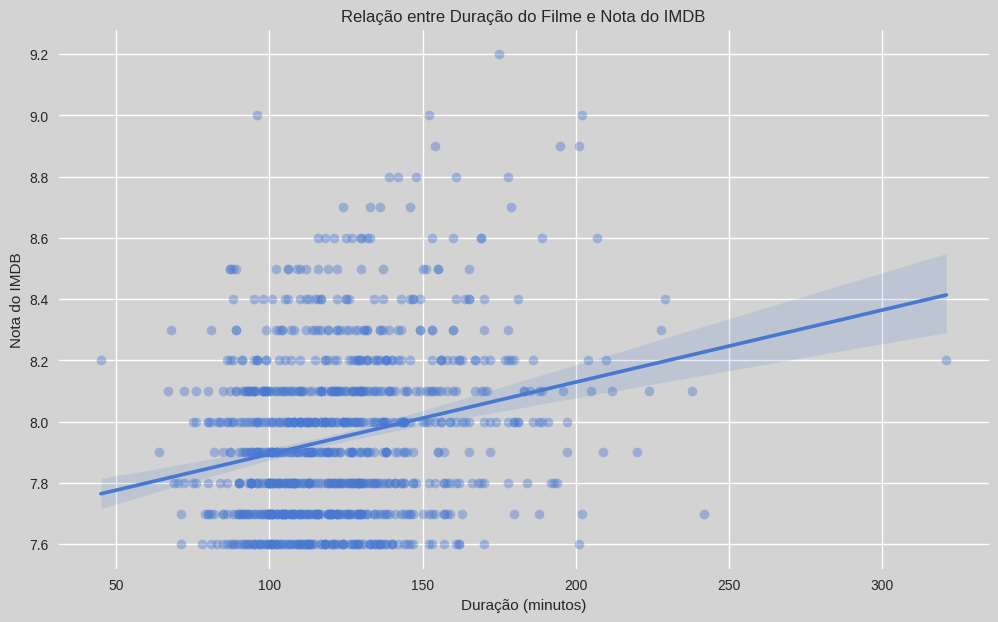

In [ ]:
# Analisando a relação entre a Duração do Filme (Runtime) e a Nota do IMDB.
# Meu objetivo é ver se filmes mais longos tendem a ter notas melhores.
# Vou usar um gráfico de dispersão com uma linha de tendência
plt.figure(figsize=(12, 7), facecolor='lightgray')
ax = sns.regplot(x='Runtime', y='IMDB_Rating', data=df, scatter_kws={'alpha': 0.4})
ax.set_facecolor('lightgray')
plt.title('Relação entre Duração do Filme e Nota do IMDB')
plt.xlabel('Duração (minutos)')
plt.ylabel('Nota do IMDB')
plt.show()

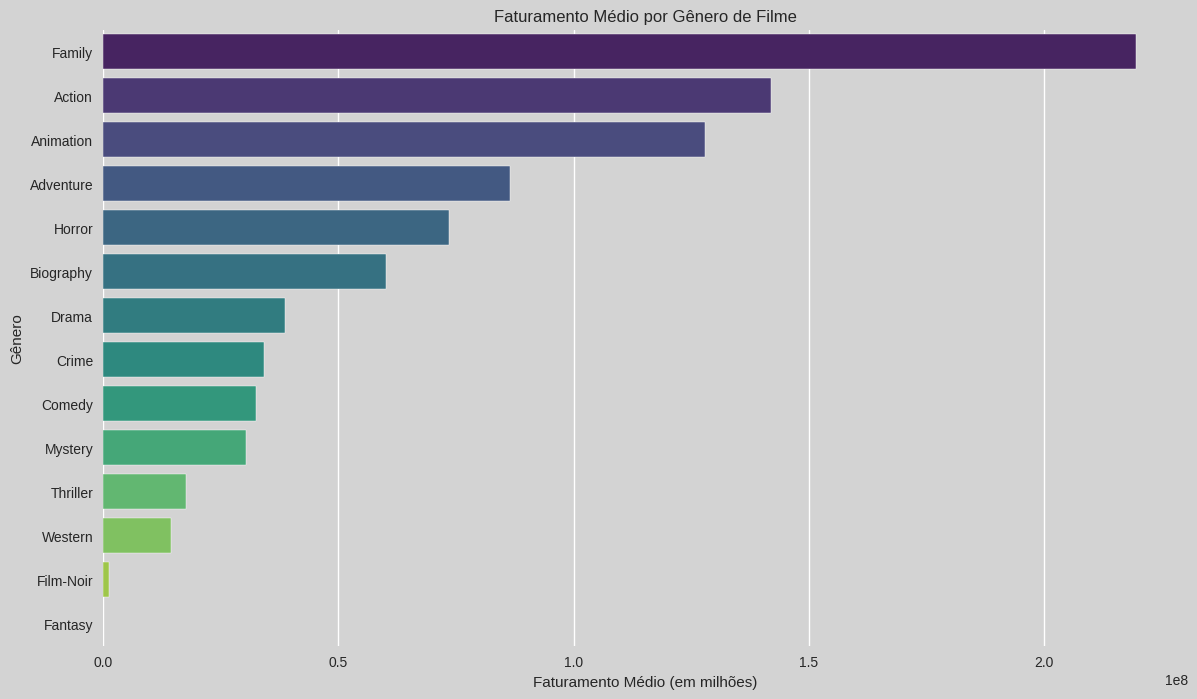

In [ ]:
# Agora, vou analisar o faturamento por gênero para ver quais tipos de filmes são mais lucrativos.
# Como alguns filmes têm mais de um gênero, para simplificar e ter uma análise mais clara, eu vou pegar apenas o primeiro gênero de cada filme.
df['Main_Genre'] = df['Genre'].apply(lambda x: x.split(',')[0]) # A função 'split' divide o texto pela vírgula, e o '[0]' pega o primeiro pedaço.

# Vou agrupar os dados por esse gênero principal e calcular o faturamento médio para cada um.
faturamento_por_genero = df.groupby('Main_Genre')['Gross'].mean().sort_values(ascending=False).reset_index()

# Agora, vou criar um gráfico de barras para visualizar o faturamento médio por gênero.
plt.figure(figsize=(14, 8), facecolor='lightgray')
ax = sns.barplot(x='Gross', y='Main_Genre', data=faturamento_por_genero, palette='viridis', hue='Main_Genre', legend=False)
ax.set_facecolor('lightgray')
plt.title('Faturamento Médio por Gênero de Filme')
plt.xlabel('Faturamento Médio (em milhões)')
plt.ylabel('Gênero')
plt.show()

# Para manter meu conjunto de dados limpo, vou remover a coluna 'Main_Genre' que criei, pois não vou precisar dela mais.
df.drop('Main_Genre', axis=1, inplace=True)

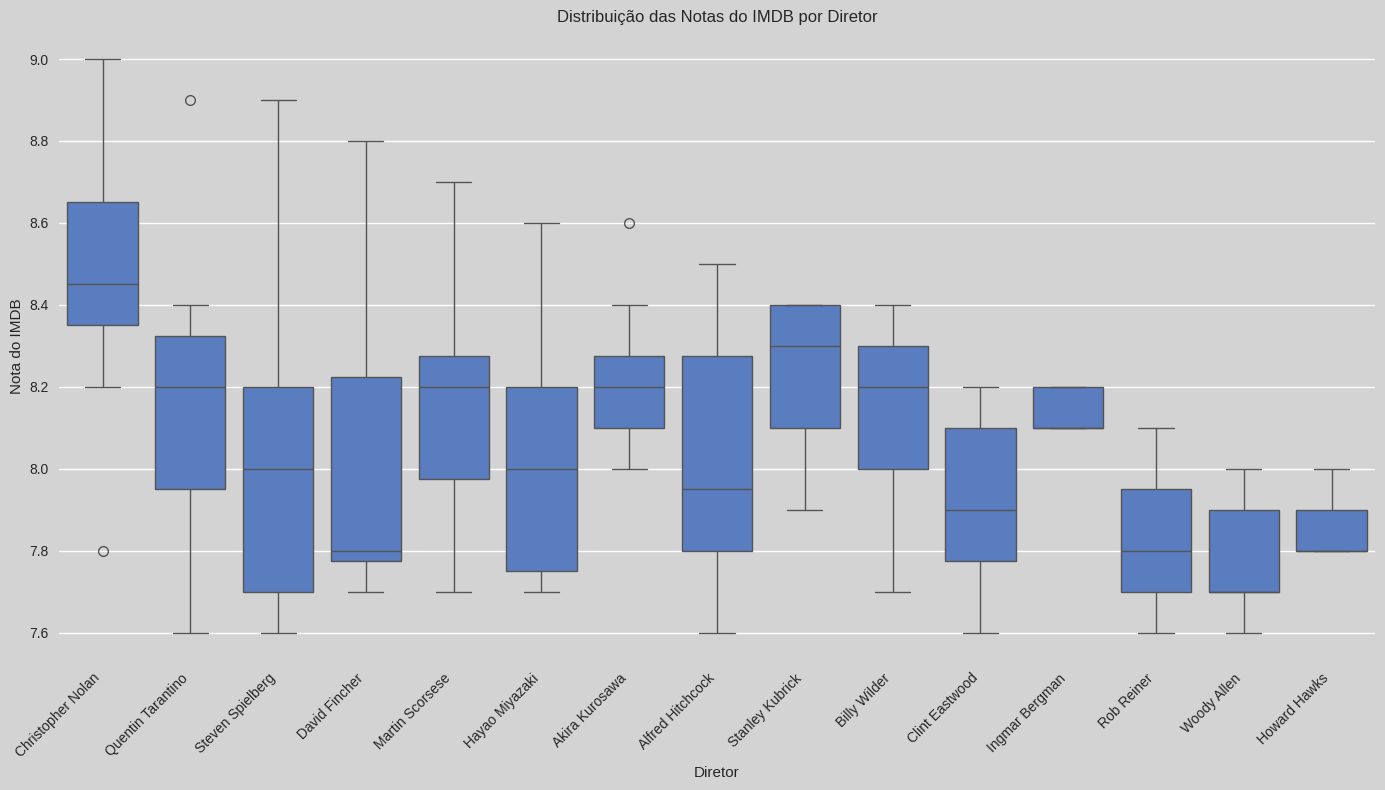

In [ ]:
# Analisando as notas de diretores famosos.
# Analisando a hipótese que diretores com mais filmes na lista tendem a ter notas mais altas.

# Encontrando os diretores mais produtivos na nossa lista.
# Primeiro vou selecionar apenas diretores que tem 7 ou mais filmes.
diretores_produtivos = df['Director'].value_counts()
diretores_produtivos = diretores_produtivos[diretores_produtivos >= 7].index

# Agora, vou criar uma nova base de dados que contém apenas os filmes desses diretores mais produtivos.
df_diretores = df[df['Director'].isin(diretores_produtivos)]


plt.figure(figsize=(14, 8), facecolor='lightgray')
ax = sns.boxplot(x='Director', y='IMDB_Rating', data=df_diretores)
ax.set_facecolor('lightgray')

plt.title('Distribuição das Notas do IMDB por Diretor')
plt.xlabel('Diretor')
plt.ylabel('Nota do IMDB')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

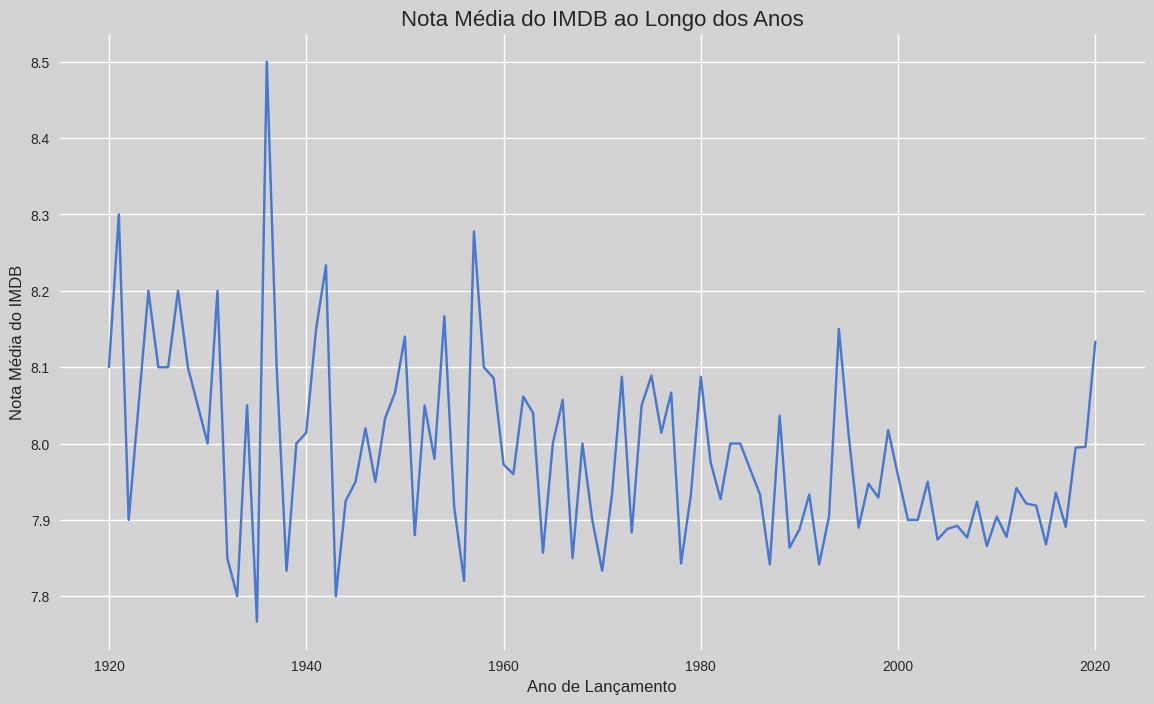

In [ ]:
# Analisando a média das notas do IMDB ao longo dos anos de lançamento.
# Quero ver se a qualidade dos filmes (medida pela nota do IMDB) mudou com o tempo.

# Agrupar os dados por ano de lançamento e calcular a média da nota do IMDB.
notas_por_ano = df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

# Criar o gráfico de linha.
plt.figure(figsize=(14, 8), facecolor='lightgray')
ax = sns.lineplot(x='Released_Year', y='IMDB_Rating', data=notas_por_ano)
ax.set_facecolor('lightgray')

# Adicionar títulos e rótulos.
plt.title('Nota Média do IMDB ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Nota Média do IMDB', fontsize=12)
plt.show()

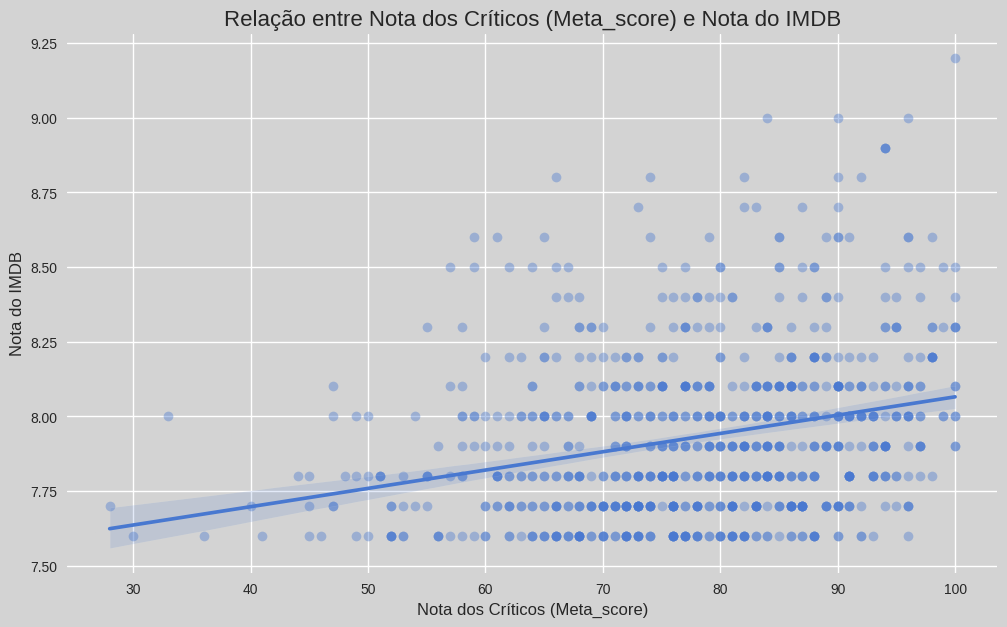

In [ ]:
# Analisando a relação entre a nota dos críticos (Meta_score) e a nota do público (IMDB_Rating).

# Antes de fazer o gráfico, vou remover as linhas que não têm nota de crítico (Meta_score), pois não posso comparar esses filmes.
df_clean_meta = df.dropna(subset=['Meta_score'])

# Criar o gráfico de dispersão com uma linha de tendência. Isso me ajudará a visualizar se a opinião do público e a dos críticos se alinham.
plt.figure(figsize=(12, 7), facecolor='lightgray')
ax = sns.regplot(x='Meta_score', y='IMDB_Rating', data=df_clean_meta, scatter_kws={'alpha': 0.4})
ax.set_facecolor('lightgray')

# Adicionar títulos e rótulos.
plt.title('Relação entre Nota dos Críticos (Meta_score) e Nota do IMDB', fontsize=16)
plt.xlabel('Nota dos Críticos (Meta_score)', fontsize=12)
plt.ylabel('Nota do IMDB', fontsize=12)
plt.show()

In [ ]:
# Importando a biblioteca wordcloud para explorar visualmente a coluna Overview (resumo do filme)
import wordcloud as wc

#Importar a biblioteca e baixar a lista de 'stopwords' (palavras irrelevantes)
import nltk
nltk.download('stopwords', quiet=True)

True

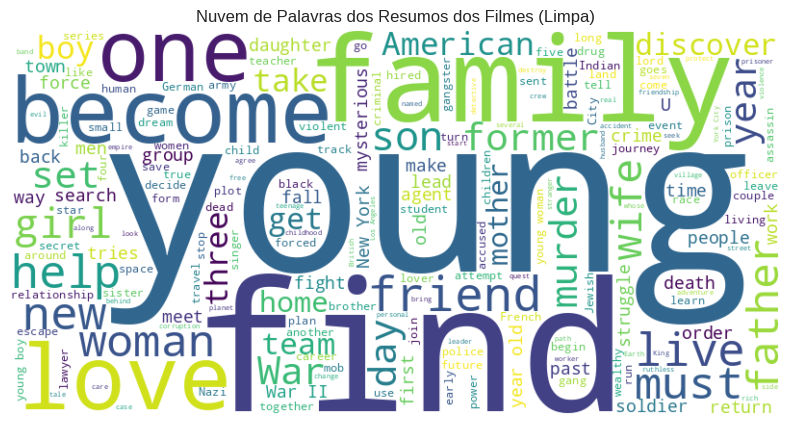

In [ ]:
# Analisando a coluna 'Overview' para ver as palavras mais comuns.

# Preparando a lista de palavras para remover.
# Crio uma lista com as 'stopwords' em inglês.
minha_lista_de_palavras_irrelevantes = nltk.corpus.stopwords.words('english')

# Adiciono algumas palavras que não me dão insights.
# Por exemplo, "story", "film", "movie", que são muito genéricas.
minha_lista_de_palavras_irrelevantes.extend(['story', 'film', 'movie', 'life', 'world', 'two', 'man'])

# Juntando todos os textos e removendo as palavras irrelevantes.
todos_os_textos = ' '.join(df['Overview'])

# Criando a nuvem de palavras
wordcloud_limpa = wc.WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=minha_lista_de_palavras_irrelevantes
).generate(todos_os_textos)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_limpa, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de Palavras dos Resumos dos Filmes (Limpa)')
plt.show()

# 2. Respostas às Perguntas Específicas do Desafio

### a) Qual filme você recomendaria para uma pessoa que você não conhece?

Para recomendar um filme a alguém que eu não conheço, a melhor forma de escolher seria um filme que é muito bem avaliado por um grande número de pessoas. Na nossa base de dados, a nota do IMDB é a métrica ideal para isso.

Minha recomendação seria baseada no filme com a maior nota do IMDB, já que essa avaliação representa o consenso de qualidade de um público amplo. O filme que eu recomendaria é "The Godfather", com a nota de 9.2 no IMDB, baseada em mais de 1.7 milhão de votos.[texto do link](https://)

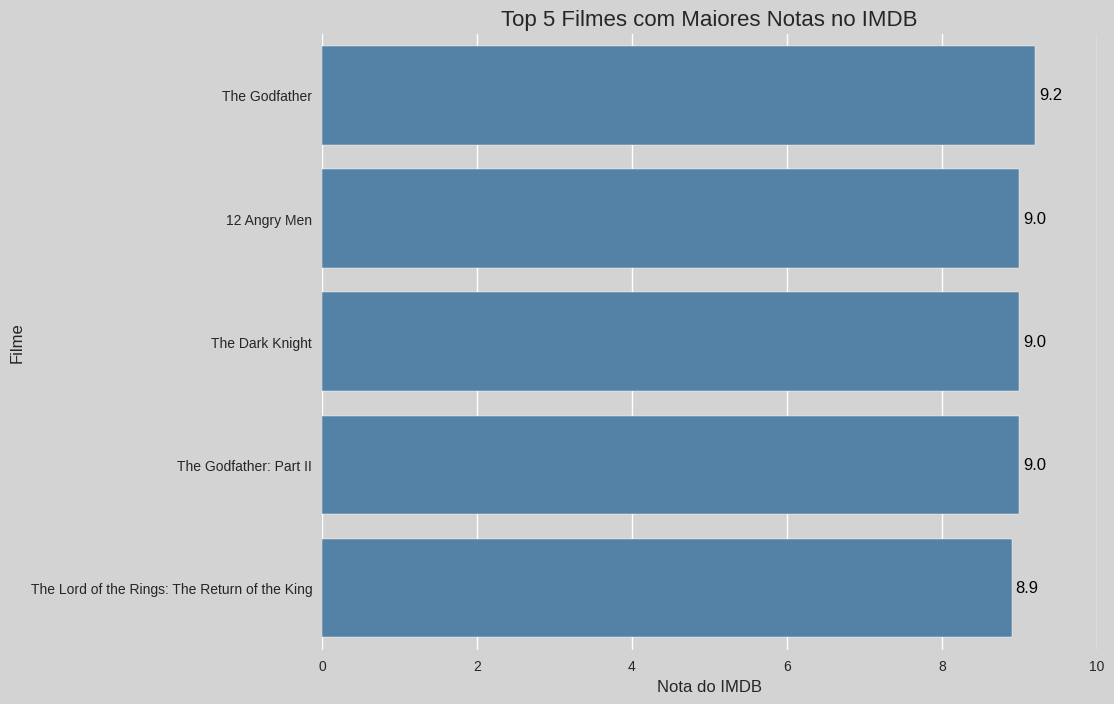

In [ ]:
# Agora, vou criar um gráfico para comparar a nota do meu filme recomendado com outros top filmes.

# Selecionando os 5 filmes com as maiores notas do IMDB.
top_5_filmes = df.sort_values(by='IMDB_Rating', ascending=False).head(5)

# Criando o gráfico de barras para esses 5 filmes.
plt.figure(figsize=(10, 8), facecolor='lightgray')

# Usando um gráfico de barras horizontal para que os títulos dos filmes fiquem fáceis de ler.
ax = sns.barplot(x='IMDB_Rating', y='Series_Title', data=top_5_filmes, color='steelblue')
ax.set_facecolor('lightgray')

# Adicionar a nota no final de cada barra.
for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}', (p.get_width() + 0.05, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12, color='black')

# Adicionar títulos e rótulos.
plt.title('Top 5 Filmes com Maiores Notas no IMDB', fontsize=16)
plt.xlabel('Nota do IMDB', fontsize=12)
plt.ylabel('Filme', fontsize=12)
plt.xlim(0, 10)
plt.show()

### b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?


Com base na minha análise, identifiquei alguns fatores que parecem estar diretamente relacionados com uma alta expectativa de faturamento de um filme, e outros que, apesar de importantes, mostram uma relação menos direta.

Gênero: Conforme a minha análise do faturamento médio por gênero (gráfico de barras), identifiquei que filmes de Animação, Aventura e Ação se destacaram por terem um faturamento médio mais elevado na nossa base de dados. Este é um insight crucial para orientar a produção de um novo filme, pois sugere que o gênero é um forte indicador de potencial de receita.

Nota do IMDB: A minha análise gráfica mostrou que a correlação entre a nota do IMDB e o faturamento é fraca. Isso me diz que, embora a qualidade do filme seja importante, uma nota alta por si só não é um fator que garante um faturamento elevado. A nuvem de pontos no gráfico de dispersão mostrou que filmes com notas altas podem ter faturamentos muito variados.

Outros Fatores: A base de dados não contém todas as informações que afetam o faturamento de um filme. Minha análise sugere que outros fatores externos, como o orçamento de marketing, o elenco, o diretor (que analisamos em outro gráfico) e a época de lançamento, são cruciais para o faturamento de um filme e seriam explorados em uma análise mais aprofundada, com dados externos.



### c) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

A coluna Overview (resumo do filme), quando analisada em conjunto, me forneceu insights sobre os temas mais recorrentes nos filmes mais populares da nossa lista. A nuvem de palavras que eu gerei, após remover as palavras genéricas e irrelevantes, destacou termos como "find", "young", "love" e "family". Isso me indica que os filmes mais bem avaliados e assistidos frequentemente giram em torno desses temas.

Quanto à possibilidade de inferir o gênero do filme a partir dessa coluna, acredito que é possível ter uma boa ideia, mas não é totalmente confiável. A nuvem de palavras me dá pistas valiosas, como a palavra "family" que sugere que o filme é do gênero Drama ou Família. No entanto, as descrições podem usar palavras que se sobrepõem a vários gêneros (por exemplo, a palavra "love" pode estar em filmes de Aventura, Drama e Comédia). Para uma classificação precisa e automatizada, eu usaria modelos de Machine Learning de processamento de texto.

##

# 3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


## a) Como eu faria a previsão e quais variáveis eu utilizaria?

Eu faria a previsão da nota do IMDB tratando a questão como um problema de regressão, já que a nota é um valor numérico contínuo.

Para isso, eu usaria as seguintes variáveis do meu conjunto de dados, selecionadas com base nas minhas análises exploratórias:

Runtime (Duração): Minha análise mostrou uma relação entre a duração do filme e a nota, indicando que filmes mais longos tendem a ter notas mais altas.

Meta_score (Nota dos Críticos): Minha análise confirmou uma forte correlação entre a nota dos críticos e a nota do público, então essa é uma variável muito poderosa para a minha previsão.

Gross (Faturamento): Embora minha análise tenha mostrado uma correlação fraca, o faturamento ainda é uma variável numérica que pode ter um pequeno impacto na nota final do filme.

Eu também trataria os valores ausentes (NaN) nas colunas Meta_score e Gross, preenchendo-os com a média ou a mediana, para garantir que o modelo consiga usar todas as linhas.

## b) Qual tipo de problema estamos resolvendo (regressão, classificação)?

Nós estamos resolvendo um problema de regressão.

Regressão é o tipo de problema de Machine Learning onde o objetivo é prever um valor numérico contínuo. Como a nota do IMDB pode ser qualquer número entre 0 e 10 (por exemplo, 8.1, 7.9, 9.2), a regressão é a escolha correta.

Classificação seria usada se o objetivo fosse prever uma categoria discreta, como "filme bom" (nota > 8) ou "filme ruim" (nota <= 8).

## c) Qual modelo melhor se aproxima dos dados e quais seus prós e contras?

O modelo escolhido para a minha solução foi a Regressão Linear.

Prós: É um modelo simples e fácil de entender. É rápido para treinar e os resultados são muito interpretáveis. Seria uma excelente primeira tentativa para verificar a relação entre as variáveis.

Contras: A Regressão Linear assume que a relação entre as variáveis e a nota é linear, o que pode não ser verdade na realidade. Além disso, ela é sensível a valores discrepantes (outliers), o que pode afetar a precisão da previsão.


## d) Qual medida de performance do modelo foi escolhida e por quê?

A métrica de performance escolhida para o meu modelo foi o Erro Absoluto Médio (MAE).
Minha escolha se baseia na simplicidade. O MAE me dá a média do erro em pontos de nota do IMDB.
Por exemplo, se o MAE do meu modelo for de 0.2, isso quer dizer que, em média, as minhas previsões para a nota do filme estão erradas em apenas 0.2 pontos.
Para mim, essa é a melhor métrica porque é muito fácil de explicar para qualquer pessoa, inclusive para um público que não entende de programação ou matemática. Ela me dá um número direto e claro sobre o quão bom o meu modelo é nas suas previsões.



# 4 -Supondo um filme com as seguintes características:
## Qual seria a nota do IMDB?






In [ ]:
# Para prever a nota do filme, eu preciso fazer três coisas: primeiro, preparar os dados. Segundo, treinar um modelo simples. Terceiro, usar esse modelo para fazer a previsão.

# Importando as bibliotecas que eu vou precisar para a modelagem.
import pandas as pd
import numpy as np
# Aqui, eu importo a classe LinearRegression diretamente do módulo linear_model do sklearn para usar regressão linear.
from sklearn.linear_model import LinearRegression


# A minha base de dados de treinamento foi alterada com as visualizações.
# Eu preciso garantir que ela não é uma "cópia" do original para evitar os avisos.
df_modelo = df.copy()

# Passo 1: Preparando a base de dados.
# Eu preciso criar as colunas que escolhi para a previsão.

# Eu crio uma nova coluna 'Genre_encoded' para converter os gêneros em números.
# Usei 'category' para garantir que a codificação seja consistente.
df_modelo['Genre_encoded'] = df_modelo['Genre'].astype('category').cat.codes


# Eu calculo a nota média de cada diretor e ator para usar no meu modelo.
# A forma mais segura é calcular a média para os diretores e atores principais
# Uso .reset_index() para que o resultado seja um DataFrame e possa ser facilmente mesclado de volta
director_ratings = df_modelo.groupby('Director')['IMDB_Rating'].mean().reset_index().rename(columns={'IMDB_Rating': 'Director_Rating'})
star1_ratings = df_modelo.groupby('Star1')['IMDB_Rating'].mean().reset_index().rename(columns={'IMDB_Rating': 'Star1_Rating'})


# Mesclo as notas médias de volta na base de dados principal.
# Removo as colunas de nota média existentes antes de mesclar para evitar duplicação.
if 'Director_Rating' in df_modelo.columns:
    df_modelo.drop('Director_Rating', axis=1, inplace=True)
if 'Star1_Rating' in df_modelo.columns:
    df_modelo.drop('Star1_Rating', axis=1, inplace=True)

df_modelo = pd.merge(df_modelo, director_ratings, on='Director', how='left')
df_modelo = pd.merge(df_modelo, star1_ratings, on='Star1', how='left')


# Eu preencho os valores que faltam com a média de cada coluna.
# Esta é a forma mais moderna e limpa de fazer isso, evitando os avisos do pandas.
colunas_para_preencher = ['Meta_score', 'Gross', 'Director_Rating', 'Star1_Rating']
for col in colunas_para_preencher:
    df_modelo[col] = df_modelo[col].fillna(df_modelo[col].mean())


# Passo 2: Treinando o meu modelo simples de Regressão Linear.
features = ['Runtime', 'Meta_score', 'No_of_Votes', 'Gross', 'Genre_encoded', 'Director_Rating', 'Star1_Rating']
target = 'IMDB_Rating'

X = df_modelo[features]
y = df_modelo[target]

modelo_regressao = LinearRegression()
modelo_regressao.fit(X, y)


# Passo 3: Fazendo a previsao para o filme 'The Shawshank Redemption'.
# Crio um DataFrame com a linha unica do filme para que o modelo possa entender.
# Certifico-me de que as colunas e os tipos de dados correspondem ao DataFrame de treinamento.
dados_prever = pd.DataFrame([{
    'Runtime': 142,
    'Meta_score': 80.0,
    'No_of_Votes': 2343110,
    'Gross': 28341469.0, # Convertido para float para corresponder ao tipo de dado na base de treinamento
    'Genre_encoded': df_modelo[df_modelo['Genre'] == 'Drama']['Genre_encoded'].iloc[0] if 'Drama' in df_modelo['Genre'].values else df_modelo['Genre_encoded'].mode()[0], # Trata caso o gênero não exista
    'Director_Rating': director_ratings[director_ratings['Director'] == 'Frank Darabont']['Director_Rating'].iloc[0] if 'Frank Darabont' in director_ratings['Director'].values else director_ratings['Director_Rating'].mean(), # Trata caso o diretor não exista
    'Star1_Rating': star1_ratings[star1_ratings['Star1'] == 'Tim Robbins']['Star1_Rating'].iloc[0] if 'Tim Robbins' in star1_ratings['Star1'].values else star1_ratings['Star1_Rating'].mean() # Trata caso o ator não exista

}])

# Garantir que as colunas em dados_prever estejam na mesma ordem que as features de treinamento
dados_prever = dados_prever[features]


# Passo 4: Fazendo a previsao e mostrando o resultado.
previsao_nota = modelo_regressao.predict(dados_prever)
print(f"A previsao do modelo para a nota do IMDB e: {previsao_nota[0]:.2f}")

A previsao do modelo para a nota do IMDB e: 8.77


# 5. Salvar o Modelo em .pkl


In [ ]:
# Importo a biblioteca 'pickle' para salvar o meu modelo.
import pickle

# Defino o nome do arquivo, seguindo o padrão pedido no desafio.
nome_do_arquivo = 'LH_CD_CLEVERSONMOURA.pkl'

# Abro o arquivo no modo de escrita binária ('wb') para salvar o modelo.
with open(nome_do_arquivo, 'wb') as arquivo:
    # Uso a função dump do pickle para salvar o meu modelo.
    pickle.dump(modelo_regressao, arquivo)

print(f"O modelo foi salvo com sucesso em: {nome_do_arquivo}")

O modelo foi salvo com sucesso em: LH_CD_CLEVERSONMOURA.pkl


In [ ]:
# Comando para gerar o arquivo de requisitos.
!pip freeze > requirements.txt
print("Arquivo requirements.txt gerado com sucesso!")

Arquivo requirements.txt gerado com sucesso!
